# Pseudo Integrator

In [26]:
# Copyright (C) 2020 Danny Schneider
##
## This program is free software; you can redistribute it and/or
## modify it under the terms of the GNU General Public
## License as published by the Free Software Foundation;
## either version 2, or (at your option) any later version.
##
## Octave is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied
## warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR
## PURPOSE.  See the GNU General Public License for more
## details.
##
## You should have received a copy of the GNU General Public
## License along with Octave; see the file COPYING.  If not,
## write to the Free Software Foundation, 59 Temple Place -
## Suite 330, Boston, MA 02111-1307, USA.

In [27]:
clear all;
close all;

fig=1;

available_graphics_toolkits()
loaded_graphics_toolkits()
graphics_toolkit ("gnuplot");

ans =
{
  [1,1] = fltk
  [1,2] = gnuplot
}

ans =
{
  [1,1] = fltk
  [1,2] = gnuplot
}



In [28]:
%%file my_integrator.m

# very cheap implementation on µC with barrelshifter...
function [result]=my_integrator(x,xo,fac)
    tmp  = bitshift(xo,fac) .- xo .+ x;
    result = bitshift(tmp,-fac);
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/DSP/my_integrator.m'.


## Test 1

nos = 1024
fac = 6


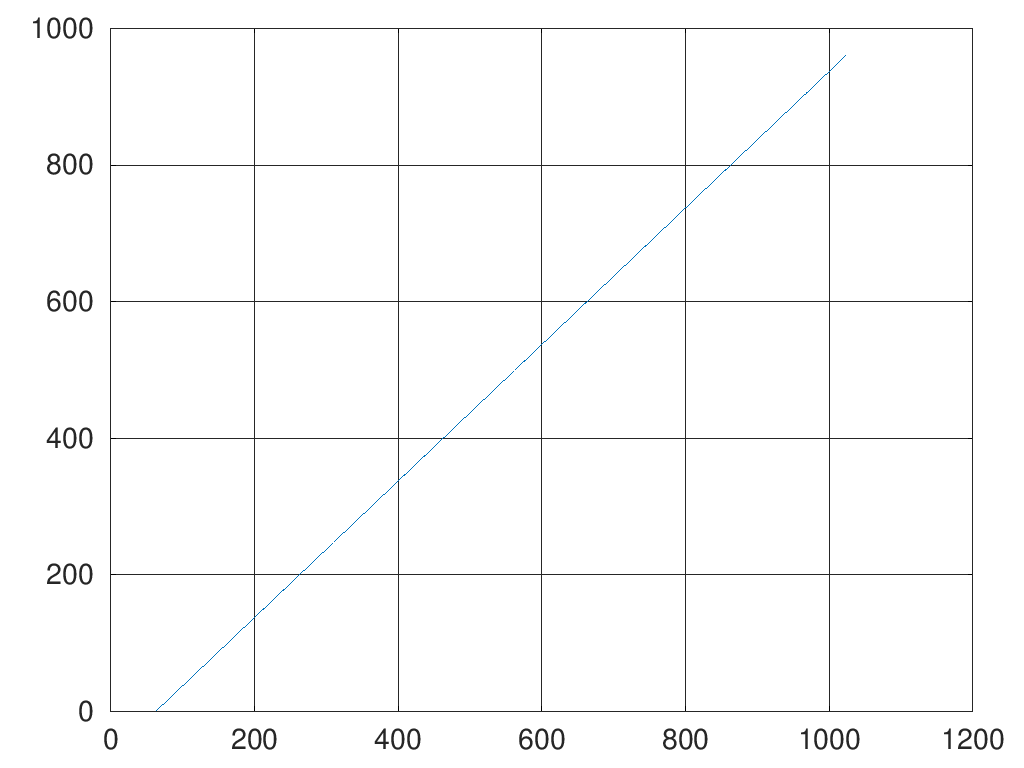

In [29]:
nos = 1024
fac=6

a=0:1:nos-1;
b=zeros(1,nos);

b(1,1) =  my_integrator(a(1,1),0,fac);
for ii = 2:1:nos
  b(1,ii) =  my_integrator(a(1,ii),b(1,ii-1),fac);
endfor

figure(fig++)
plot(a,b);
grid on;

# Test 2

nos = 25000
fac = 6
Ampl = 1
xbit = 8


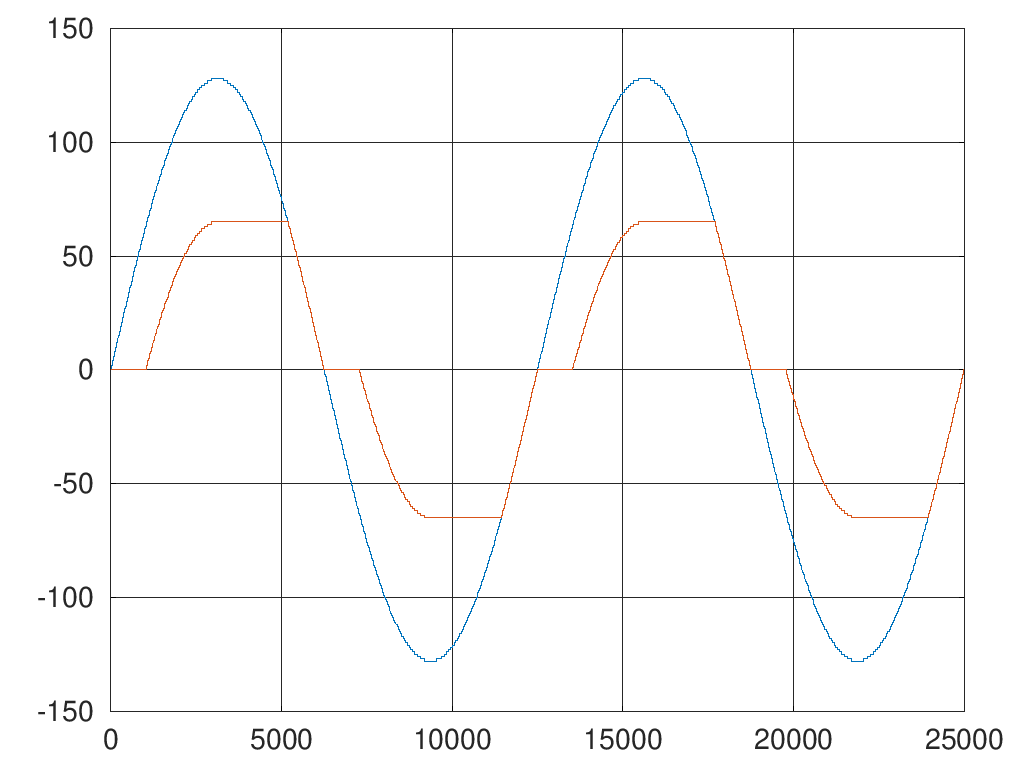

In [30]:
nos = 25000   # number of samples
fac=6              # shift by fac bits

Ampl=1.0
xbit = 8                  # xbit ADC
levels = 2.^xbit;    # Levels of ADC 
span = 1 .- (-1);     # Natural Values
LSB= span./levels; # Least sign. Bit



x=0:1:(nos.-1);
data = Ampl.*sin(x .* pi() ./ ((nos./4).-1));
a= round(data./LSB);
b=zeros(1,nos);

b(1,1) =  my_integrator(a(1,1),0,fac);
for ii = 2:1:nos
  b(1,ii) =  my_integrator(a(1,ii),b(1,ii-1),fac);
endfor

figure(fig++)
plot(x,a,x,b);
grid on;

# Test 3

nos = 25000
fac = 6
Ampl = 0.6000
xbit = 8


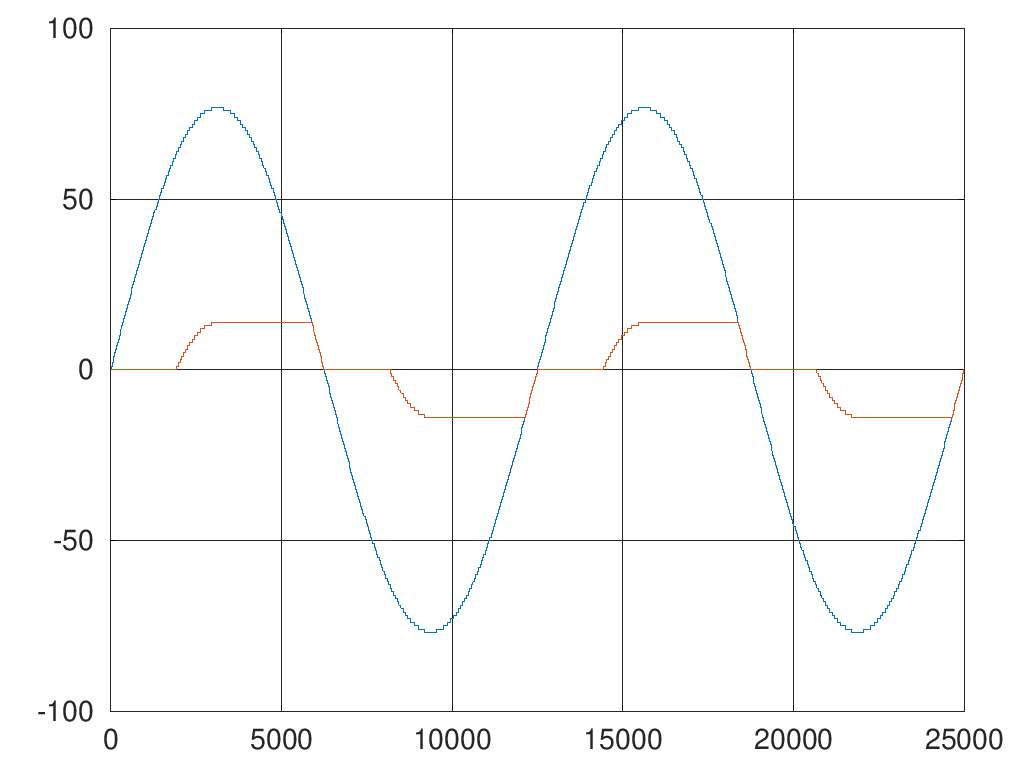

In [31]:
nos = 25000   # number of samples
fac=6              # shift by fac bits

Ampl=0.60
xbit = 8                  # xbit ADC
levels = 2.^xbit;    # Levels of ADC 
span = 1 .- (-1);     # Natural Values
LSB= span./levels; # Least sign. Bit



x=0:1:(nos.-1);
data = Ampl.*sin(x .* pi() ./ ((nos./4).-1));
a= round(data./LSB);
b=zeros(1,nos);

b(1,1) =  my_integrator(a(1,1),0,fac);
for ii = 2:1:nos
  b(1,ii) =  my_integrator(a(1,ii),b(1,ii-1),fac);
endfor

figure(fig++)
plot(x,a,x,b);
grid on;